# <font color='blue'>Data Science Academy Big Data Real-Time Analytics com Python e Spark</font>

# <font color='blue'>Capítulo 6</font>

****** Este Jupyter Notebook foi atualizado para a versão 3.6.1. da Linguagem Python em 13/06/2017 ******

## Estudo de Caso 1 - Regressão

Neste estudo de caso veremos como funciona a construção de um modelo preditivo do início ao fim. Resolveremos o problema de negócio usando técnicas de regressão.

Definição do problema: Construir um modelo para prever o preço de uma casa na cidade de Boston, nos EUA. Para treinar nosso modelo preditivo, usaremos o dataset Boston House Price do repositório da UCI.

Atributos do Dataset:

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000
11. PTRATIO: pupil-teacher ratio by town
12. Bk: proportion of blacks by town
13. LSTAT: lower status of the population
14. MEDV: Median value of owner-occupied homes in 1000s

## Importando os Módulos

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBClassifier
from pandas import read_csv
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Carregando os Dados

In [2]:
# Carregando os dados e definindo o título das colunas
url = "http://datascienceacademy.com.br/blog/aluno/Python-Spark/Datasets/boston-houses.csv"
colunas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dados = read_csv(url, delim_whitespace = True, names = colunas)

## Sumarizando os Dados

In [3]:
# Estatística Descritiva

# Shape
print(dados.shape)

# Tipos de Dados
print(dados.dtypes)

# Head (primeiras linhas do dataset)
print(dados.head(20))

# Describe
print(dados.describe())

# Correlação
print(dados.corr(method = 'pearson'))

(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object
       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8   0.21124  12.5   7.87     0  0.5

## Visualização de Dados

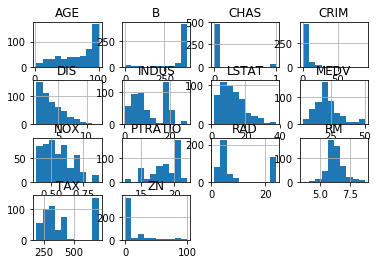

In [4]:
# Histogramas - Visualização Unimodal (por atributo)
dados.hist()
plt.show()

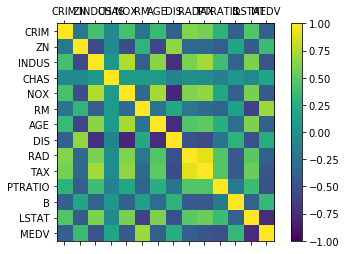

In [5]:
# Matriz de Correlação
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dados.corr(), vmin = -1, vmax = 1, interpolation = 'none')
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colunas)
ax.set_yticklabels(colunas)
plt.show()

## Preparação dos Dados

In [6]:
# Separação em Dados de Treino e Teste
dados_valores = dados.values

# Variáveis independentes
X = dados_valores[:,0:13]

# Vairável dependente
Y = dados_valores[:,13]

# Conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, Y, test_size = 0.20, random_state = 7)

## Avaliação do Algoritmo

In [7]:
# Criando modelo de Machine Leanring a partir de cada algoritmo
# Vamos utilizar como métrica o MSE (Mean Squared Error). Valor igual a zero indica excelente nível de precisão.
modelos = []
modelos.append(('LR', LinearRegression()))
modelos.append(('LASSO', Lasso()))
modelos.append(('EN', ElasticNet()))
modelos.append(('KNN', KNeighborsRegressor()))
modelos.append(('CART', DecisionTreeRegressor()))
modelos.append(('SVR', SVR()))
resultados = []
nomes = []

# Percorrendo cada um dos modelos
for nome, modelo in modelos:
    kfold = model_selection.KFold(10, True, random_state = 7)
    cross_val_result = model_selection.cross_val_score(modelo, 
                                                        X_treino, 
                                                        Y_treino, 
                                                        cv = kfold, 
                                                        scoring = 'neg_mean_squared_error')
    resultados.append(cross_val_result)
    nomes.append(nome)
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)

LR: -22.006009 (12.188886)
LASSO: -27.105803 (13.165915)
EN: -27.923014 (13.156405)
KNN: -39.808936 (16.507968)
CART: -27.024106 (17.043384)
SVR: -85.676872 (34.383644)


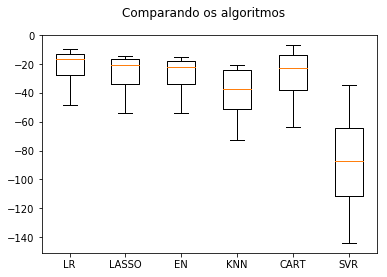

In [8]:
# De acordo com os resultados anteriores, os modelos criados com Regressão Linear e CART apresentaram 
# os valores mais baixos para o MSE e portanto os melhores resultados.
# Isso pode ser confirmado, comparando os algoritmos através de boxplots.
fig = plt.figure()
fig.suptitle('Comparando os algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [9]:
# Os dados estão em diferentes escalas e isso pode estar prejudicando a performance de alguns algoritmos.
# Vamos avaliar novamente os algoritmos, mas agora padronizando os dados (colocando-os na mesma escala).
# Aplicando Padronização ao conjunto de dados
# Nesta técnica, os dados serão transformados de modo que estejam com uma dsitrbuição normal, com média igual a zero e
# desvio padrão igual a 1.

pipelines = []
pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('Scaled-LASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('Scaled-EN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('Scaled-KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('Scaled-CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('Scaled-SVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
resultados = []
nomes = []

# Percorrendo cada um dos modelos
for nome, modelo in pipelines:
    kfold = model_selection.KFold(10, True, random_state = 7)
    cross_val_result = model_selection.cross_val_score(modelo, 
                                                        X_treino, 
                                                        Y_treino, 
                                                        cv = kfold, 
                                                        scoring = 'neg_mean_squared_error')
    resultados.append(cross_val_result)
    nomes.append(nome)
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)

Scaled-LR: -22.006009 (12.188886)
Scaled-LASSO: -27.205896 (12.124418)
Scaled-EN: -28.301160 (13.609110)
Scaled-KNN: -21.456867 (15.016218)
Scaled-CART: -26.879057 (18.405838)
Scaled-SVR: -29.570433 (18.052964)


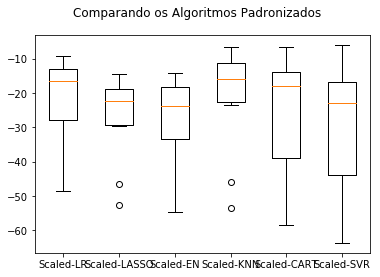

In [10]:
# Nos resultdados anteriores, podemos perceber que a padronização gerou um efeito no modelo criado com algoritmo KNN,
# reduzindo as taxa de erros.
# A distribuição dos scores abaixo comprova que o KNN é o melhor algortimo para criar o modelo preditivo, 
# uma vez que ese dataset esteja padronizado.
# Comparando os algoritmos
fig = plt.figure()
fig.suptitle('Comparando os Algoritmos Padronizados')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

## Tuning do Modelo criado com KNN 

In [11]:
# Embora o KNN tenha apresentado a menor taxa de erro após a padronização dos dados, podemos ainda otimizá-lo
# com o ajuste dos parâmetros.

# Definindo a escala
scaler = StandardScaler().fit(X_treino)
rescaledX = scaler.transform(X_treino)

# Ajustando valores para o tamanho do K
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
valores_grid = dict(n_neighbors = k_values)

# Criando o modelo
modelo = KNeighborsRegressor()

# Definindo K
kfold = model_selection.KFold(10, True, random_state = 7)

# Testando diferenets combinações com os valores de K
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid, scoring = 'neg_mean_squared_error', cv = kfold)
grid_result = grid.fit(rescaledX, Y_treino)

# Printo do resultado
# ***********************
# De acordo com o resultado, o melhor valor de k é 3. Com isso alcançamos um MSE de -18, o melhor até agora.
# ***********************
print("Melhor MSE: %f utilizando %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Melhor MSE: -19.532921 utilizando {'n_neighbors': 1}
-19.497829 (15.769847) with: {'n_neighbors': 1}
-19.977984 (13.803973) with: {'n_neighbors': 3}
-21.270967 (14.833544) with: {'n_neighbors': 5}
-21.577292 (14.952592) with: {'n_neighbors': 7}
-21.001075 (14.701297) with: {'n_neighbors': 9}
-21.490306 (14.866957) with: {'n_neighbors': 11}
-21.268533 (14.454969) with: {'n_neighbors': 13}
-21.968092 (14.209894) with: {'n_neighbors': 15}
-22.739880 (14.492752) with: {'n_neighbors': 17}
-23.506901 (14.903224) with: {'n_neighbors': 19}
-24.240303 (15.156565) with: {'n_neighbors': 21}


/Users/dmpm/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


## Utilizando Métodos Ensemble

In [12]:
# *************** Dependendo do seu computador esta célula pode levar alguns minutos para ser executada **********

# Métodos Ensemble são outra forma de otimizar o modelo preditivo. Vamos utilizar aqui:
# Metodos Bagging - RandomForest e Extra Trees
# Métodos Boosting - AdaBoost, Gradient Boosting e XGBoost

ensembles = []
ensembles.append(('Scaled-AB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('Scaled-GBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('Scaled-RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('Scaled-ET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
ensembles.append(('Scaled-XGBoost', Pipeline([('Scaler', StandardScaler()),('XG', XGBClassifier())])))
resultados = []
nomes = []

# Percorrendo cada um dos modelos
for nome, modelo in ensembles:
    kfold = model_selection.KFold(10, True, random_state = 7)
    cross_val_result = model_selection.cross_val_score(modelo, 
                                                        X_treino, 
                                                        Y_treino, 
                                                        cv = kfold, scoring = 'neg_mean_squared_error')
    resultados.append(cross_val_result)
    nomes.append(nome)
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)

Scaled-AB: -15.009208 (7.982644)
Scaled-GBM: -10.971944 (8.605022)
Scaled-RF: -14.799406 (10.115530)
Scaled-ET: -11.097596 (7.062409)
Scaled-XGBoost: -23.771487 (9.096182)


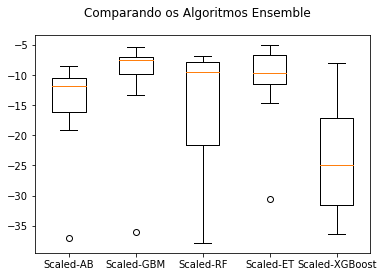

In [13]:
# **** Lembre-se: Cada algoritmo espera receber os dados em um formato/escala específicos e diversas variações ****
# **** no dataset podem ser necessárias até que se consiga o modelo ideal. ****

# Podemos ver que o Gradient Boosting apresentou o menor mean score e portanto a menor taxa de erro.
# Vamos comprovar isso comparando os modelos criados com esses algoritmos
fig = plt.figure()
fig.suptitle('Comparando os Algoritmos Ensemble')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

## Tuning do Modelo criado com GBM (Gradient Boosting Method)

In [14]:
# Embora o GBM tenha apresentado a menor taxa de erro entre os métodos ensemble, podemos ainda otimizá-lo
# com o ajuste dos parâmetros.

# Definindo a escala
scaler = StandardScaler().fit(X_treino)
rescaledX = scaler.transform(X_treino)

# O número padrão de estimadores com o GBM é 100 (número de árvores). Vamos testar outros valores para o estimador.
valores_grid = dict(n_estimators = np.array([50,100,150,200,250,300,350,400]))

# Criando o modelo
modelo = GradientBoostingRegressor(random_state = 7)

# Definindo k
kfold = model_selection.KFold(10, True, random_state = 7)

# Testando a combinação de parâmetros
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid, cv = kfold, scoring = 'neg_mean_squared_error')
grid_result = grid.fit(rescaledX, Y_treino)

# Printo do resultado
# ***********************
# De acordo com o resultado, o melhor valor para os estimadores é 400. 
# Com isso alcançamos um MSE de -9, definitivamente um excelente nível de precisão.
# ***********************
print("Melhor MSE: %f utilizando %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Melhor MSE: -10.654941 utilizando {'n_estimators': 400}
-11.689782 (8.826884) with: {'n_estimators': 50}
-11.136427 (8.765057) with: {'n_estimators': 100}
-10.893565 (8.730216) with: {'n_estimators': 150}
-10.839721 (8.651002) with: {'n_estimators': 200}
-10.709710 (8.534690) with: {'n_estimators': 250}
-10.704931 (8.491650) with: {'n_estimators': 300}
-10.645023 (8.408234) with: {'n_estimators': 350}
-10.617587 (8.347822) with: {'n_estimators': 400}


/Users/dmpm/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


## Finalizando o Modelo Preditivo

In [15]:
# Preparando a versão final do modelo
scaler = StandardScaler().fit(X_treino)
rescaledX = scaler.transform(X_treino)
modelo = GradientBoostingRegressor(random_state = 7, n_estimators = 400)
modelo.fit(rescaledX, Y_treino)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=400,
             presort='auto', random_state=7, subsample=1.0, verbose=0,
             warm_start=False)

In [16]:
# Aplicando o modelo aos dados de teste
rescaledValidationX = scaler.transform(X_teste)
previsoes = modelo.predict(rescaledValidationX)

# Nosso MSE nos dados de teste é de 11.8, muito próximo do que conseguimos nos dados de treino
print(mean_squared_error(Y_teste, previsoes))

11.8752520792


# Fim

### Obrigado - Data Science Academy - <a href=http://facebook.com/dsacademy>facebook.com/dsacademybr</a>